# Data Preparation and Visualization

[Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) is an approach to analyzing data sets to summarize and understand their main characteristics, often with visual methods.

Starting with your *Machine Learning Checklist* you will see that a crucial step is **preparing and understanding** the data. It is a step where you will spend most of your time.  Here is an example checklists from [Aurélien Géron](10_20_2018_Machine-Learning-Project-Checklist.txt) that you can adapt to your needs.   

In these series of notebooks, we explore the Home Credit data set. We clean, preprocess and visualize the data for downstream processes in the Data Science Workflow.  All notebooks can be obtained from Github : https://github.com/chalendony/data-prep-visualization
 
## Part 1: Data Preparation
* Overview Data Set
* Access Data Repository : Quilt
* Validate the Data Types  
* Missing Data Strategies : DataWig
    + Categoricals
    + Numericals
* Automated Feature Engineering : Featuretools
* Colinear features
* Feature Selection 

## Part 2: Piplelines

* Feature Union
* ColumnTransform
 

## Part 3 : Reshaping Data
* Reshape Static Version : Jupyter Slides
* Reshape Interactive Version : Jupyter Exercise2 Extension
* Groupby

## Part 4: Interactive Visualizaton

* Plotly
* Altair

## Extra Material

* Uploding Homecredit data to Quilt <a href="Quilt Setup HomeCredit Data.ipynb">Example: Store and Access Data from Quilt Repository</a>

* Imputating Categorical Variables : https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779; https://github.com/awslabs/datawig/blob/master/README.md

* XGBoost History picture and compared strategy uses no imputation with impuation

* Bokeh

* Align Tables: http://localhost:8888/notebooks/Align.ipynb#Aligning-the-Homecredit-Tables

## Links:
* Slides: https://www.blog.pythonlibrary.org/2018/09/25/creating-presentations-with-jupyter-notebook/)
* Workshop Code on Github: https://github.com/chalendony/data-prep-visualization 
* Plotly: https://dash.plot.ly/getting-started
* Altair https://altair-viz.github.io/
* The EOS Color Pallette


In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer
pd.set_option('display.max_columns', 125)
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.reset_option.html?highlight=set_option#pandas-reset-option
import quilt
from scripts.preprocess import percent_missing

# Overview Data Set 
The [data](https://www.kaggle.com/c/home-credit-default-risk/data) is provided by Home Credit,  a service dedicated to provided lines of credit (i.e.: loans). 

![home_credit.png](attachment:home_credit.png "Home Credit Default Risk")

# Load Data from Quilt Data Repository

_I work locally, I don't need a cloud?_

* You probably perform most of your analysis locally, but Cloud-based workflows have benefits. 
* Will our day-to-day workflows become cloud-native? ... time will tell, so stay tuned!
* __NOTE:__ Since we are __*not*__ using sensitive data, we can use the cloud
* The environment for our workshop looks like this: 
![workshop_env.png](attachment:workshop_env.png)

## Optional: Reset local repository

In [1]:
#### quilt.rm("avare/homecredit") # local

## Optional:  Install public package in local repository

* First time only, we initially install the package in the local repo; 
* Installation is only needed again if there is a new version of the data
* Optionally, use the hash if you want to download a specific version of the data

In [7]:
# quilt.install("avare/homecredit", hash="1266d85da94de98efe04a61beb6b028db90ad703155b28b550fbfb79e9b8fb7e")

  0%|          | 0.00/707M [00:00<?, ?B/s]

100%|██████████| 707M/707M [02:58<00:00, 3.96MB/s] 


## Import the package into Python


In [3]:
from quilt.data.avare import homecredit

## Glimpse Quilt Package

What is contained in the Quilt package?

* Use Quilt's inspect() - takes a while returns summary info ...
* Alternatively, just use package name

In [5]:
# quilt.inspect("avare/homecredit")
type(homecredit)

quilt.nodes.GroupNode

## Glimpse: Applicaton Dataframe 

In [12]:
df = homecredit.application_train()
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [18]:
## check all data types
df = homecredit.installments_payments()
df.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


## Removing the Target Variable 

* The target variable=TARGET 
* The schema identifier = SK_ID_CURR.
* You can use df.pop() to remove and return the target, then use values when storing in a new variable
* You can drop the identifier

Docs:https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pop.html

## Dataframe Information

Dataframe.info() function prints information that can answer the following questions about a DataFrame:

* How many rows and columns do we have?
* Did csv.read() infer the types correctly?
* How many of each dtypes is used?
* Which rows / columns can be excluded from further analysis?
* How much memory does the data require?

In [8]:
df.info(null_counts=True,verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

# Validate Data Types

* Pandas has inferred our the data types. 
* However sometimes the types are not as we would like.
* Referring to the data description, we manually verify the data types for the categorical and numeric variables.

In [7]:
categorical_features = ['TARGET','SK_ID_CURR','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE', \
                        'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL','FLAG_EMP_PHONE',\
                        'FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE',\
                        'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',\
                        'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',\
                        'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','ORGANIZATION_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3',\
                        'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9',\
                        'FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15',\
                        'FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']

___<font color=red> Exercise 1.</font>___ Above is a list of the categorical variables in the application data from. All remaining variables are numerical. Create a  list to holds all numeric variables. 


* Store the results in a variable named: __"numerical_features"__, this variable will be used later.
* HINT: Try using df.columns.difference() 
* Convert the final result to a list.
* `Ctrl-B` to open [Scratchpad](https://github.com/minrk/nbextension-scratchpad) and execute your code against the current kernel without modifying the notebook document

Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Index.difference.html?highlight=difference#pandas.Index.difference 

In [10]:
numerical_features=df.columns.difference(categorical_features).values.tolist()
len(numerical_features)

69

___<font color=red> Exercise 2. </font>___ During exploration, we print often to make a visual inspection. Use the Python String format() to print the number of numeric features: 

* `Ctrl-B` to open [Scratchpad](https://github.com/minrk/nbextension-scratchpad) and execute your code against the current kernel without modifying the notebook document

Docs: https://docs.python.org/3/tutorial/inputoutput.html#the-string-format-method     

In [36]:
print("I have {} numeric features".format(len(numerical_features)))

I have 69 numeric features


___<font color=red> Exercise 3.</font>___ Use the String format() Method https://docs.python.org/3/tutorial/inputoutput.html#the-string-format-methodformat to print the number of   variables in your numerical dataframe?

* `Ctrl-B` to open [Scratchpad](https://github.com/minrk/nbextension-scratchpad) and execute your code against the current kernel without modifying the notebook document


In [ ]:
print('I have {} numeric variables)'.format(len(numerical_features)))

In [ ]:
## Exercise 1: Practice Cell 

# Missing Data Strategy : Categorical

_What are my options for handling missing data?_

+ Option 1: Delete instances (rows) that have missing data:  eg: DF.dropna(subset=["column_name"]

+ Option 2: Drop columns with a high percentage of missing values: DF.drop("total_bedrooms", axis=1)

+ Option 3: Impute: fill in these missing values

+ Option 4: Algorithms such as, XGBoost that can handle missing values with no need for imputation. 

Which option we choose depends on a number of factors: such as, importance of the column or amount of missing data. Lets decide on a strategy by first, examine the missing columns per datatype: categorical and numeric.

## Glimpse Categorical

Have a look at the categorical columns to ensure they are correct.

In [9]:
df[categorical_features]

,TARGET,SK_ID_CURR,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,1,100002,"Stone, brick",No,reg oper account,block of flats,Cash loans,M,N,Y,...,0,0,0,0,0,0,0,0,0,0
1,0,100003,Block,No,reg oper account,block of flats,Cash loans,F,N,N,...,0,0,0,0,0,0,0,0,0,0
2,0,100004,None,None,None,None,Revolving loans,M,Y,Y,...,0,0,0,0,0,0,0,0,0,0
3,0,100006,None,None,None,None,Cash loans,F,N,Y,...,0,0,0,0,0,0,0,0,0,0
4,0,100007,None,None,None,None,Cash loans,M,N,Y,...,0,0,0,0,0,0,0,0,0,0
5,0,100008,None,None,None,None,Cash loans,M,N,Y,...,0,0,0,0,0,0,0,0,0,0
6,0,100009,None,None,None,None,Cash loans,F,Y,Y,...,0,0,1,0,0,0,0,0,0,0
7,0,100010,None,None,None,None,Cash loans,M,Y,Y,...,0,0,0,0,0,0,0,0,0,0
8,0,100011,None,None,None,None,Cash loans,F,N,Y,...,0,0,0,0,0,0,0,0,0,0
9,0,100012,None,None,None,None,Revolving loans,M,N,Y,...,0,0,0,0,0,0,0,0,0,0


## Percent Missing Categorical Values

_How much categorical data is actually missing?_

* The question comes up frequently, so lets use a script from our own toolbox:  percent_missing(df, categorical_features)
    
* The percent_missing() script takes the original dataframe and a list target columns as input, and returns a dataframe consisting of totals and percent missing for the target columns.

In [26]:
missing_cat = percent_missing(df, categorical_features)
missing_cat.tail()

,Total,Perc_Missing
WEEKDAY_APPR_PROCESS_START,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
SK_ID_CURR,0,0.0
REG_REGION_NOT_WORK_REGION,0,0.0
FLAG_DOCUMENT_21,0,0.0


_How can I filter out variables with zeros in the Perc_Missing column?_

* You can use a query to filter out rows based on the Perc_Missing column in the dataframe

In [24]:
threshold = 0

___<font color=red> Exercise 3.</font>___  Use the query() function in Pandas to filter the Perc_Missing column using threshold = 0. 

Docs: https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.query.html

In [25]:
percent_missing(df, categorical_features).query('Perc_Missing > + @threshold')

,Total,Perc_Missing
FONDKAPREMONT_MODE,210295,68.386172
WALLSMATERIAL_MODE,156341,50.840783
HOUSETYPE_MODE,154297,50.176091
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
NAME_TYPE_SUITE,1292,0.420148


## Strategy for Missing Categoricals

Let's assume that a missing categorical value have a special meaning. So, we impute the missing categorical values with a dedicated symbol.

Pick a dedicatd symbol and ensure that it is not already present in the data set.

In [28]:
cat_fillin = '999'
df.isin([cat_fillin]).any().sum()

0

___<font color=red> Exercise 4.</font>___ Use the Python Simple Imputer() to fill in the missing categorical values with the constant


Docs: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

In [29]:
cat_imputer = SimpleImputer(strategy="constant", fill_value=cat_fillin, verbose= True)
cat_imputer.fit(df[categorical_features])
imputed_cat = cat_imputer.transform(df[categorical_features])

In [33]:
print('The imputed array contains {} rows and {} columns.'format(imputed_cat.shape[0], imputed_cat.shape[1]))

SyntaxError: invalid syntax (<ipython-input-33-9649cf1b69f8>, line 1)

In [31]:
imputed_cat.shape[1]

53

In [18]:
imputed_cat[3:13,76]

IndexError: index 76 is out of bounds for axis 1 with size 53

In [ ]:
(df[categorical_features])
imputed = cat_imputer.transform(df[categorical_features])

## Verify Imputed Categoricals

In [22]:
percent_missing(x, categorical_features)

AttributeError: 'numpy.ndarray' object has no attribute 'isnull'

In [74]:
cat_imputer = SimpleImputer(strategy="constant", fill_value=cat_fillin, verbose= True)
cat_imputer.fit(df[categorical_features])

SimpleImputer(copy=True, fill_value='999', missing_values=nan,
       strategy='constant', verbose=True)

## Extra: KNN to impute Categorical Variables

# Missing Data Strategy : Numericals

## Summary of Numeric Values

Now, let's look at the missing values for the numeric values.

In [ ]:
cat_imputer = SimpleImputer(strategy="constant", fill_value=cat_fillin, verbose= True)
cat_imputer.fit(df[categorical_features])

In [49]:
df[numerical_features].head()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,OBS_60_CNT_SOCIAL_CIRCLE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,NaN,0.018801,0.0149,0.9722,0.9722,0.9722,0.6192,0.6243,0.6341
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,0.003541,0.0714,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,26.0,0.010032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29686.5,312682.5,297000.0,135000.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,NaN,0.008019,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,513000.0,121500.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.028663,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Summary of Missing Numerival Values

Compute the missing percent of missing values in the dataframe for the numeric columns

In [51]:
missing_application_train_data.loc[numerical_features].sort_values(by='%Missing', ascending=False)

NameError: name 'missing_application_train_data' is not defined

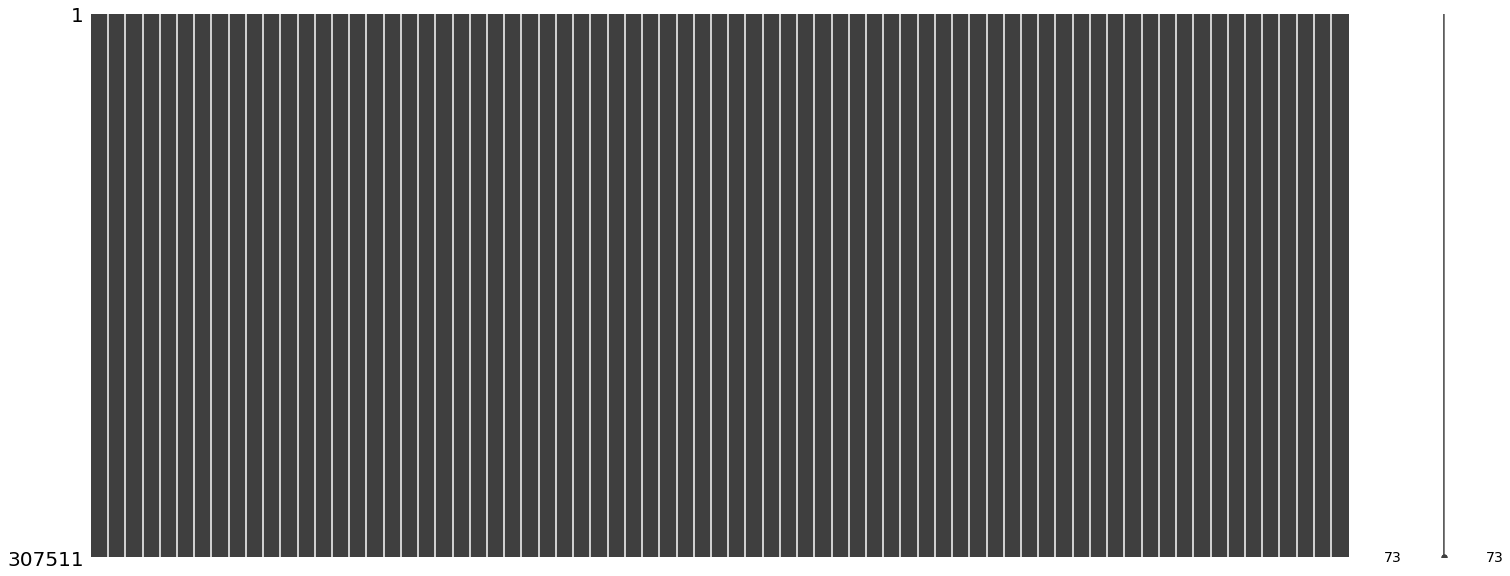

In [53]:
imputer = Imputer(strategy="median", verbose= True)
imputer.fit(df[num_vars]) 
X = imputer.transform(df[num_vars].copy())
temp = pd.DataFrame(X, columns=num_vars) 
msno.matrix(temp) 

## Filling Missing Categorical Columns with Special Value

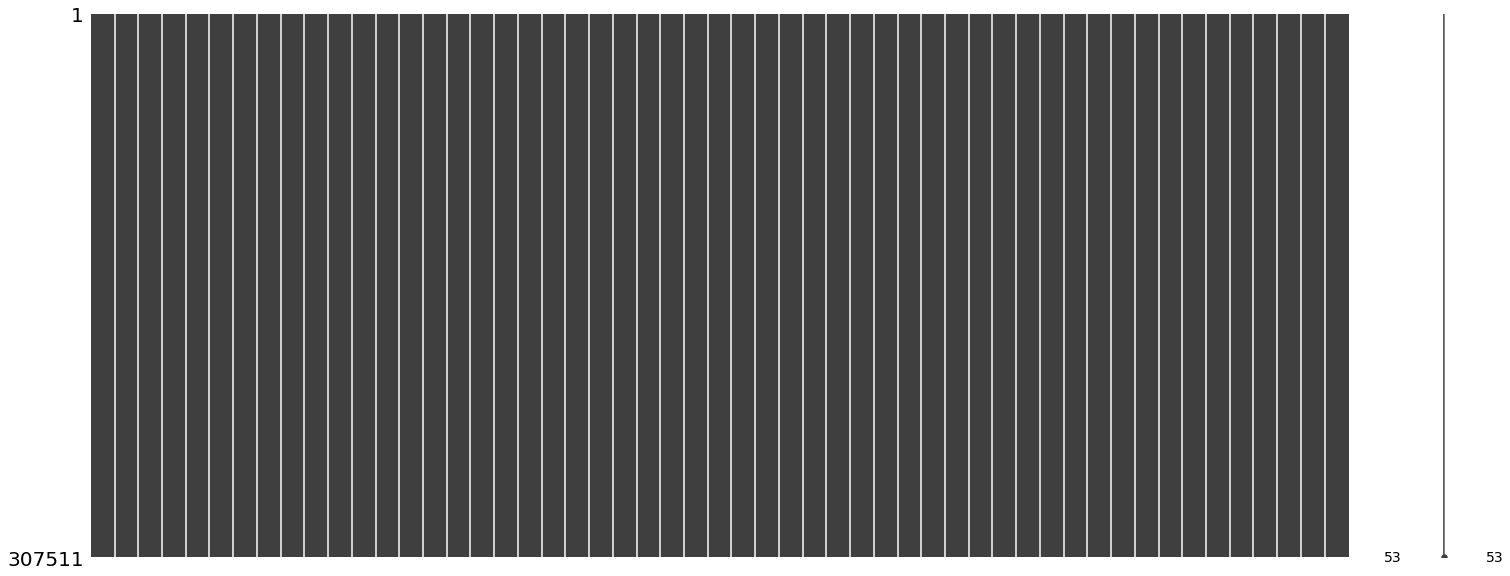

In [55]:
# Replace missing data with a special value. Missing information captured in the model
temp = df[cat_vars].fillna(999,inplace=False)
msno.matrix(temp)

## Encoding Dummy Variables - Option 1

In [80]:
pd.get_dummies(df[cat_vars], dummy_na=True)
# question how do revert back to the original value?

,TARGET,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,...,NAME_CONTRACT_TYPE_nan,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_CAR_nan,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,FLAG_OWN_REALTY_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,1,1,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
1,0,1,1,0,1,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,0,1,1,1,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
5,0,1,1,1,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
6,0,1,1,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
7,0,1,1,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
8,0,1,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
9,0,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1


## Encoding Dummy Variables - Option 2 

In [77]:
encoder = LabelBinarizer()
temp_cat_1hot = encoder.fit_transform(df['FLAG_DOCUMENT_4']) 
temp_cat_1hot
# ... repeat for all columns

['TARGET',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_CONTRACT_TYPE_nan',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'CODE_GENDER_XNA',
 'CODE_GENDER_nan',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_CAR_nan',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'FLAG_OWN_REALTY

In [ ]:
# Example: Create categorical variables
# https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe

cat_columns = df.select_dtypes(['category']).columns
cat_columns
Index([u'col2', u'col3'], dtype='object')
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

# Now as Categorical.from_array is deprecated, use Categorical directly
dataframe.col3 = pd.Categorical(dataframe.col3).codes
dataframe.col3, mapping_index = pd.Series(dataframe.col3).factorize()

# Feature Selection

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = pd.concat((pd.DataFrame(df.TARGET),pd.get_dummies(df[cat_vars], dummy_na=True)), axis=1)
print(X.shape)
X = X.dropna(axis=0, how='any')
print(X.shape)
y = X.TARGET
y.shape
X_new = SelectKBest(chi2, k=100).fit_transform(X, y)
X_new
X_new.shape

(307511, 202)
(307511, 202)


(307511, 100)